# Named Entity Recognition

- `nltk` + Stanford coreNLP
- `spacy` - includes informal language corpora as well

In [15]:
import nltk

sentence = """Nikola Tesla was a Serbian-American inventor, electrical engineer, mechanical engineer, and futurist who is best known for his contributions to the design of the modern alternating current electricity supply system."""

[nltk_data] Downloading package words to
[nltk_data]     /Users/asnasiddiqui/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [6]:
# Tokenize words from the sentence
tokenized_sent = nltk.word_tokenize(sentence)

In [7]:
# POS tagging of each tokenized word
tagged_sent = nltk.pos_tag(tokenized_sent)

In [10]:
tagged_sent[:5]

[('Nikola', 'NNP'),
 ('Tesla', 'NNP'),
 ('was', 'VBD'),
 ('a', 'DT'),
 ('Serbian-American', 'JJ')]

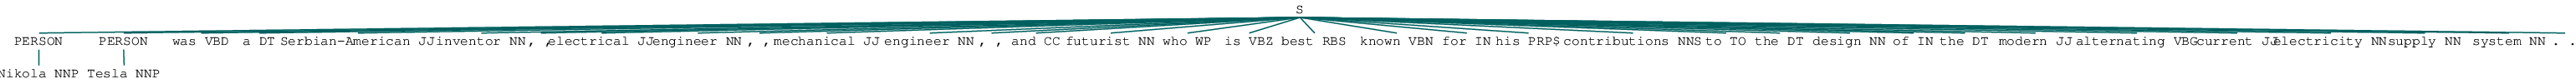

In [16]:
nltk.ne_chunk(tagged_sent)

## Pipeline for an article

In [17]:
text = """
France has approved a digital services tax despite threats of retaliation by the US, which argues that it unfairly targets American tech giants.

The 3% tax will be levied on sales generated in France by multinational firms like Google and Facebook.

The French government has argued that such firms headquartered outside the country pay little or no tax.

The US administration has ordered an inquiry into the move - which could result in retaliatory tariffs.

The new tax was approved by the French senate on Thursday, a week after it was passed by the lower house, the National Assembly.
"""

In [23]:
sentences = nltk.sent_tokenize(text)

tokenized_sentences = [nltk.word_tokenize(sent) for sent in sentences]

pos_sentences = [nltk.pos_tag(sent) for sent in tokenized_sentences]

In [25]:
pos_sentences[0]

[('France', 'NNP'),
 ('has', 'VBZ'),
 ('approved', 'VBN'),
 ('a', 'DT'),
 ('digital', 'JJ'),
 ('services', 'NNS'),
 ('tax', 'NN'),
 ('despite', 'IN'),
 ('threats', 'NNS'),
 ('of', 'IN'),
 ('retaliation', 'NN'),
 ('by', 'IN'),
 ('the', 'DT'),
 ('US', 'NNP'),
 (',', ','),
 ('which', 'WDT'),
 ('argues', 'VBZ'),
 ('that', 'IN'),
 ('it', 'PRP'),
 ('unfairly', 'RB'),
 ('targets', 'VBZ'),
 ('American', 'JJ'),
 ('tech', 'JJ'),
 ('giants', 'NNS'),
 ('.', '.')]

In [30]:
# Named entity recognition for each chunk
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

Which stems of the tree have proper nouns, i.e. 'NNP'?

In [35]:
# not sure why this isn't giving any output
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == 'NE':
            print(chunk)

In [36]:
from collections import defaultdict
import matplotlib.pyplot as plt

ner_cats = defaultdict(int)

for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_cats[chunk.label()] += 1
            
            
labels = list(ner_cats.keys())
values = [ner_cats.get(l) for l in labels]

plt.pie(values, labels=labels, autopct = '%1.1f%%', startangle=140)

([], [], [])

## spaCy

In [50]:
import en_core_web_sm

nlp = en_core_web_sm.load()

doc = nlp(text)

In [52]:
doc[:11]


France has approved a digital services tax despite threats of

In [54]:
# Iterate over the predicted entities
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

France GPE
US GPE
American NORP
3% PERCENT
France GPE
Google PRODUCT
Facebook PERSON
French NORP
US GPE
French NORP
Thursday DATE
a week DATE
the National Assembly ORG
